# 0.Targets
#### - Проведите проверку следующих гипотез:
1. Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.
2. Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.
3. Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события


#### - Ответьте на вопросы продуктовой команды:
1. Из каких источников (кампаний, устройств, локаций) к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?
2. Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?
3. Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?

# 1.Data preparation

In [3]:
!pip3 install pandas  
!pip3 install missingno 

In [2]:
import pandas as pd
import missingno as msno

In [3]:
# df_hits = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1aWTUBZoxDctNs-ldqEw-9dw0X2zR9upd')
df_hits = pd.read_csv('ga_hits.csv')
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [4]:
df_hits = df_hits[['session_id', 'event_action']]
df_hits.head()

,session_id,event_action
0,5639623078712724064.1640254056.1640254056,quiz_show
1,7750352294969115059.1640271109.1640271109,quiz_show
2,885342191847998240.1640235807.1640235807,quiz_show
3,142526202120934167.1640211014.1640211014,quiz_show
4,3450086108837475701.1640265078.1640265078,quiz_show


In [5]:
# df_sessions = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1GaQnAgzshXMl0WwKHI11e2dBjMjoTlfU')
df_sessions = pd.read_csv('ga_sessions.csv')
df_sessions.head()

C:\Users\NA_PC\AppData\Local\Temp\ipykernel_9352\3424410790.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sessions = pd.read_csv('ga_sessions.csv')


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [6]:
df_sessions.shape

(1860042, 18)

In [7]:
df_hits.shape

(15726470, 2)

In [8]:
print(df_sessions.session_id.nunique())
print(df_hits.session_id.nunique())

1860042
1734610


данные объединяет значения столбца session_id 
сделаем общую таблицу только в которую войдут только строки где session_id присутствует в обоих таблицах

In [9]:
df_united = pd.merge(df_hits, df_sessions)
df_united.head()

,session_id,event_action,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,5639623078712724064.1640254056.1640254056,quiz_show,1313077071.164025,2021-12-23,13:07:36,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,NaN,360x780,Chrome,Russia,Saint Petersburg
1,5639623078712724064.1640254056.1640254056,view_new_card,1313077071.164025,2021-12-23,13:07:36,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,NaN,360x780,Chrome,Russia,Saint Petersburg
2,5639623078712724064.1640254056.1640254056,view_new_card,1313077071.164025,2021-12-23,13:07:36,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,NaN,360x780,Chrome,Russia,Saint Petersburg
3,5639623078712724064.1640254056.1640254056,view_new_card,1313077071.164025,2021-12-23,13:07:36,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,NaN,360x780,Chrome,Russia,Saint Petersburg
4,5639623078712724064.1640254056.1640254056,view_new_card,1313077071.164025,2021-12-23,13:07:36,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,NaN,360x780,Chrome,Russia,Saint Petersburg


In [10]:
df_united.shape

(15685219, 19)

In [11]:
df_united.describe(include='all')

,session_id,event_action,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
count,15685219,15685219,1.568522e+07,15685219,15685219,1.568522e+07,15684519,15685219,13486346,12852801,6480392,15685219,6526837,11739344,122287,15685219,15685219,15685219,15685219
unique,1732266,230,1.320702e+06,226,85032,NaN,280,55,406,280,1192,3,13,200,104,4947,55,159,2389
top,5442565791571325612.1632449195.1632449195,view_card,1.750498e+09,2021-05-24,13:00:00,NaN,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Apple,AuMdmADEIoPXiWpTsBEj,414x896,Chrome,Russia,Moscow
freq,768,3546622,6.871000e+03,513035,544567,NaN,5151702,4898563,5166521,9647665,4717082,11595541,3433515,4708652,78321,1480233,8197216,15270908,6795118
mean,NaN,NaN,NaN,NaN,NaN,2.696941e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.254170e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2.EDA
Разведочный анализ данных (Exploratory Data Analysis)

## 2.1 Data cleaning

In [12]:
df_united_clean = df_united.copy()
df_united_clean.shape

(15685219, 19)

In [13]:
df_united_clean.duplicated().value_counts()

True     9236278
False    6448941
dtype: int64

In [14]:
df_united_clean = df_united_clean.drop_duplicates()
df_united_clean.shape

(6448941, 19)

#### Fullness of cells

In [15]:
def print_useful_rows_info(df):
    print('Amount of useful rows:', len(df.dropna()))
    print('Persentage of filled rows', round(len(df.dropna()) / len(df) * 100, 2))

In [16]:
print_useful_rows_info(df_united_clean)

Amount of useful rows: 48776
Persentage of filled rows 0.76


In [17]:
def blank_rows_percentage(df):
  print((df.isna().sum() / len(df) * 100).sort_values(ascending=False))

In [18]:
blank_rows_percentage(df_united_clean)

device_model                99.175446
utm_keyword                 57.971084
device_os                   57.675501
device_brand                22.947520
utm_adcontent               16.589685
utm_campaign                12.166990
utm_source                   0.004590
device_category              0.000000
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
session_id                   0.000000
event_action                 0.000000
utm_medium                   0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
client_id                    0.000000
geo_city                     0.000000
dtype: float64


удаляем все колонки где пропусков больше 20%:

In [19]:
df_united_clean = df_united_clean.drop(columns=['device_model', 'utm_keyword', 'device_os', 'device_brand'], axis=1)

In [20]:
print_useful_rows_info(df_united_clean)

Amount of useful rows: 5336815
Persentage of filled rows 82.75


<AxesSubplot:>

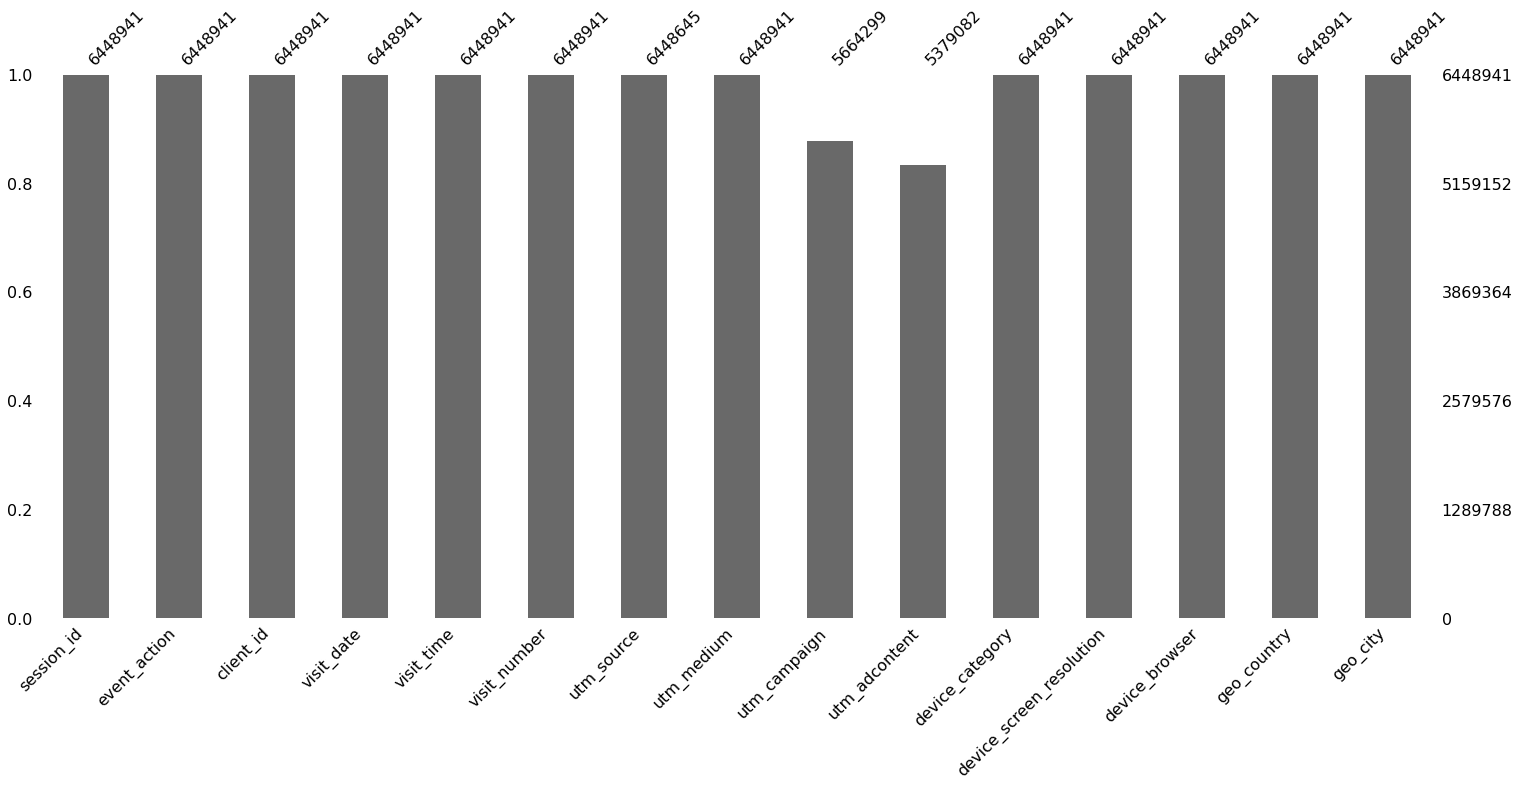

In [21]:
# диаграмма заполненности
msno.bar(df_united_clean)

<AxesSubplot:>

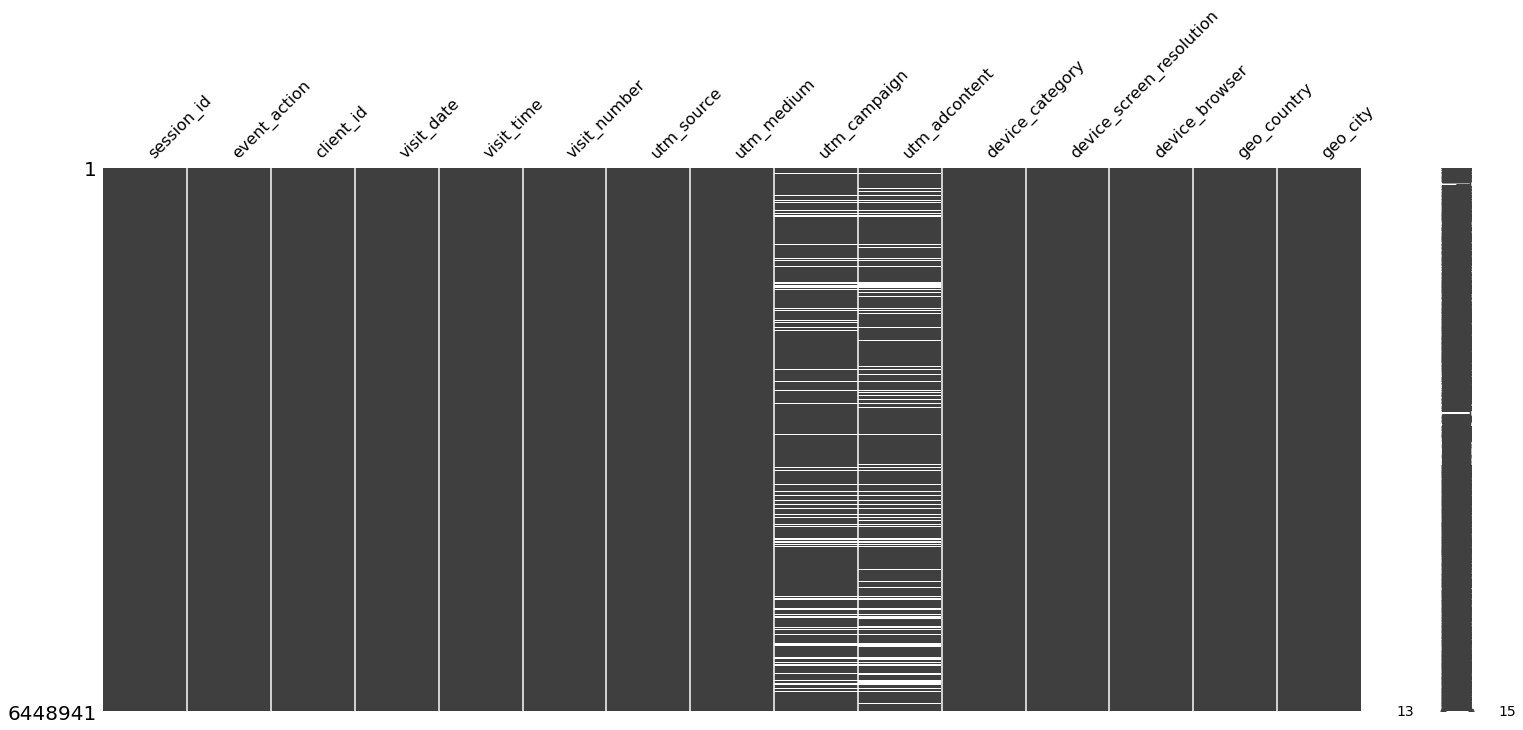

In [22]:
# матрица заполненности
msno.matrix(df_united_clean)

### Заполнение пропусков

In [24]:
df_united_clean.utm_adcontent.describe()

count                  5379082
unique                     280
top       JNHcPlZPxEMWDnRiyoBf
freq                   3911982
Name: utm_adcontent, dtype: object

In [ ]:
df_united_clean.utm_campaign.describe()

count                  5664299
unique                     406
top       LTuZkdKfxRGVceoWkVyg
freq                   1962723
Name: utm_campaign, dtype: object

заполним медианой

In [25]:
adconten_mode = str(df_united_clean.utm_adcontent.mode())
df_united_clean.utm_adcontent = df_united_clean.utm_adcontent.fillna(adconten_mode)

In [30]:
campaign_mode = str(df_united_clean.utm_campaign.mode())
df_united_clean.utm_campaign = df_united_clean.utm_campaign.fillna(campaign_mode)

In [31]:
print_useful_rows_info(df_united_clean)

Amount of useful rows: 6448645
Persentage of filled rows 100.0


### Определение типов переменных в датасете df_united

|  Переменная               | Дискретная | Непрерывная | Качественная |
|---------------------------|------------|-------------|--------------|
| visit_date                | X          |             |              |
| visit_time                | X          |             |              |
| visit_number              | X          |             |              |
| utm_source                |            |             | X            |
| utm_medium                |            |             | X            |
| utm_campaign              |            |             | X            |
| utm_adcontent             |            |             | X            |
| device_category           |            |             | X            |
| device_screen_resolution  | X          |             |              |
| device_browser            |            |             | X            |
| geo_country               |            |             | X            |
| geo_city                  |            |             | X            |
| event_action(целевая)     |            |             | X            |